In [4]:
# importer les librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [5]:
# chargement de base de données iris
iris = datasets.load_iris()

In [6]:
# affichage de données de iris
print(iris.target)

In [17]:
# stocker les données en tant que DataFrame pandas
x=pd.DataFrame(iris.data)
# definir les noms de colonnes
x.columns = ['Sepal length','Sepal_width','Petal_length','Petal_width']
y=pd.DataFrame(iris.target)
#y.columns = ['classe']

In [30]:
iris.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
x

,Sepal length,Sepal_width,Petal_length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


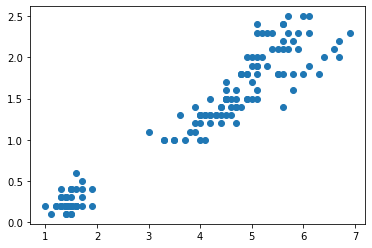

In [18]:
# Répartition du Dataset dasn un scatter plt 2D
plt.scatter(x.Petal_length,x.Petal_width)

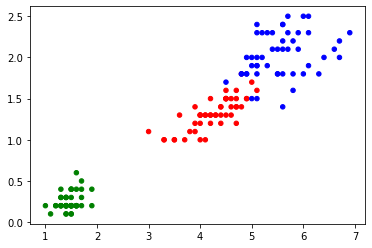

In [39]:
# visualiser les classes de notre dataset 
ColorL=np.array(['green','red','blue'])
plt.scatter(x.Petal_length,x.Petal_width,c=ColorL[iris.target],s=20)


In [40]:
# utiliser la methode elbow pour trouver le nombre optimal de clusters
inert = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    inert.append(kmeans.inertia_)

C:\Users\nadia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


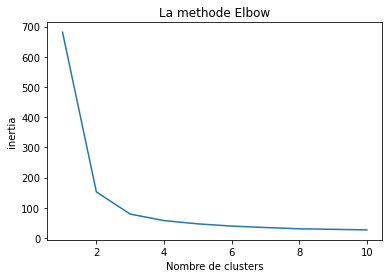

In [21]:
# Afficher la courbe de la methode elbow
plt.plot(range(1,11), inert)
plt.title('La methode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('inertia')
plt.show()

In [46]:
# Clusters K_means
model = KMeans(n_clusters=3)
model.fit(x)

KMeans(n_clusters=3)

In [47]:
# Afficher les resultat trouver par nos modele en utilisant model.labels_ ou bien model.predict(x)
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

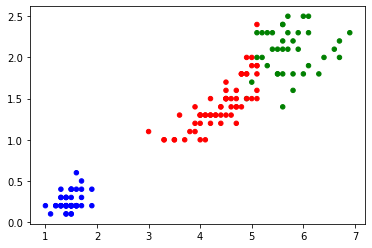

In [48]:
# visualiser les classes predites par le modele
ColorL = np.array(['green','red','blue'])
plt.scatter(x.Petal_length,x.Petal_width,c=ColorL[model.labels_],s=20)

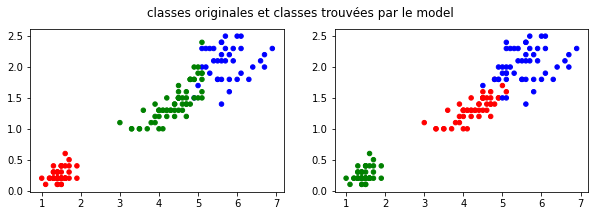

In [25]:
# visualiser les classes originales et prédites par le modèle
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,3))
fig.suptitle('classes originales et classes trouvées par le model')
ax1.scatter(x.Petal_length,x.Petal_width,c=ColorL[model.labels_],s=20)
ax2.scatter(x.Petal_length,x.Petal_width,c=ColorL[iris.target],s=20)

In [26]:
# Matrice de confusion 
from sklearn.metrics import confusion_matrix
confusion_matrix(iris.target, model.labels_)

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]], dtype=int64)